# Endometrium analysis - organoids inhibitors

In [21]:
import numpy as np
import pandas as pd
import scanpy as sc
import anndata
import os
import sys
import matplotlib.pyplot as plt

def MovePlots(plotpattern, subplotdir):
    os.system('mkdir -p '+str(sc.settings.figdir)+'/'+subplotdir)
    os.system('mv '+str(sc.settings.figdir)+'/*'+plotpattern+'** '+str(sc.settings.figdir)+'/'+subplotdir)

sc.settings.verbosity = 1  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.figdir = './figures_organoid_confInhibitors/Donor44/'
sc.logging.print_versions()
sc.settings.set_figure_params(dpi=80)  # low dpi (dots per inch) yields small inline figures

sys.executable

scanpy==1.4.4 anndata==0.6.22rc1 umap==0.3.10 numpy==1.17.5 scipy==1.3.0 pandas==0.25.3 scikit-learn==0.22.1 statsmodels==0.10.2 python-igraph==0.7.1 louvain==0.6.1


'/home/jovyan/my-conda-envs/myenvSC/bin/python'

## Load data organoid - control with hormones

In [23]:
adata_C = sc.read('data/organoids-all-TC-keep-ccg_Luzprocessing.h5ad')
print(adata_C.obs[['Inhibition', 'Sample', 'Treatment', 'Days']].drop_duplicates())
adata_C.X.shape

                                  Inhibition            Sample Treatment  \
index                                                                      
organoids7090723-AAACCTGCAGGCTCAC        nan  organoids7090723       N/H   
organoids7090724-AAACCTGAGACACGAC        nan  organoids7090724       N/H   
organoids7090726-AAACCTGAGATGAGAG        nan  organoids7090726         E   
organoids7090728-AAACCTGCACCAGATT        nan  organoids7090728         E   
organoids7090730-AAACCTGAGCTAAACA        nan  organoids7090730       E+P   
organoids7090732-AAACCTGAGGCAAAGA        nan  organoids7090732       E+P   
WSSS_END8729882-CTGAGGCGTTGTACGT         N/I   WSSS_END8729882         E   
WSSS_END8730455-GAGAGGTAGCGTTAGG         N/I   WSSS_END8730455       E+P   
WSSS_END8730359-ACGCACGAGATGTTAG         N/I   WSSS_END8730359       E+P   
WSSS_END8729880-AACAACCCAAGATGTA         N/I   WSSS_END8729880         E   
WSSS_END8730167-ACTTTCACATTCACAG         N/I   WSSS_END8730167       E+P   
WSSS_END8729

(53720, 2803)

#### Filter samples of interest

In [24]:
samples = ['WSSS_END8729879', 'WSSS_END8729881',
           # N/I + E/P
           'WSSS_END8729880',
           'WSSS_END8729975', 
           'WSSS_END8729976',
           'WSSS_END8730071',
           'WSSS_END8730167', 
           'WSSS_END8730359',
           'WSSS_END8730455']
adata_C = adata_C[[i in samples for i in adata_C.obs['Sample']]]
                  
print(adata_C.obs[['Inhibition', 'Sample', 'Treatment', 'Days']].drop_duplicates())

                                 Inhibition           Sample Treatment   Days
index                                                                        
WSSS_END8730455-GAGAGGTAGCGTTAGG        N/I  WSSS_END8730455       E+P  7.000
WSSS_END8730359-ACGCACGAGATGTTAG        N/I  WSSS_END8730359       E+P  6.000
WSSS_END8729880-AACAACCCAAGATGTA        N/I  WSSS_END8729880         E  1.125
WSSS_END8730167-ACTTTCACATTCACAG        N/I  WSSS_END8730167       E+P  5.000
WSSS_END8729881-TTGCGTCCAGCACACC        N/I  WSSS_END8729881       N/H  1.000
WSSS_END8729879-GACGCTGTCTGTTGGA        N/I  WSSS_END8729879       N/H  1.000
WSSS_END8729975-GGAACCCAGTGCTAGG        N/I  WSSS_END8729975         E  3.000
WSSS_END8730071-TATTTCGGTGTGCCTG        N/I  WSSS_END8730071       E+P  4.000
WSSS_END8729976-GACATCATCAGGAAGC        N/I  WSSS_END8729976       E+P  3.125


## Load data organoid - hormones + Inhibitors

In [25]:
adata_I = sc.read('data/organoids-N5-I-keep-ccg.h5ad')
adata_I.X.shape
print(adata_I.obs[['Inhibition', 'Sample', 'Treatment', 'Days']].drop_duplicates())

                                  Inhibition           Sample Treatment  Days
index                                                                        
WSSS_END8729977-AACACACCACCAGCGT   NOTCH-DBZ  WSSS_END8729977         E   3.0
WSSS_END8730456-AGACAAAGTACAGCGA   NOTCH-DBZ  WSSS_END8730456       E+P   7.0
WSSS_END8730171-TCCCACAAGCATCGAG  NOTCH-DADT  WSSS_END8730171       N/H   5.0
WSSS_END8729983-GGGCTACAGCAATAAC     WNT-XAV  WSSS_END8729983         E   3.0
WSSS_END8729985-CCACTTGTCCTGCCAT         N/I  WSSS_END8729985       N/H   3.0
WSSS_END8729881-GGTTAACAGTCTTCGA         N/I  WSSS_END8729881       N/H   1.0
WSSS_END8730167-TGCTCGTTCAGTGATC         N/I  WSSS_END8730167       E+P   5.0
WSSS_END8730461-CAATACGCAGTTGTCA     WNT-IWP  WSSS_END8730461       N/H   7.0
WSSS_END8730455-CGACAGCGTGCAATAA         N/I  WSSS_END8730455       E+P   7.0
WSSS_END8730264-GTGGAAGGTCCTGGGT         N/I  WSSS_END8730264       N/H   5.0
WSSS_END8729879-TAACCAGAGTCTTCGA         N/I  WSSS_END8729879   

#### Filter samples of interest

In [26]:
samples = [
           # NOTCH-DBZ 
           'WSSS_END8729977',
           'WSSS_END8730168',
           'WSSS_END8730456',
          # WNT-XAV 
           'WSSS_END8729983',
           'WSSS_END8730174',
           'WSSS_END8730462']
adata_I = adata_I[[i in samples for i in adata_I.obs['Sample']]]
                  
print(adata_I.obs[['Inhibition', 'Sample', 'Treatment', 'Days']].drop_duplicates())

                                 Inhibition           Sample Treatment  Days
index                                                                       
WSSS_END8729977-AACACACCACCAGCGT  NOTCH-DBZ  WSSS_END8729977         E   3.0
WSSS_END8730456-AGACAAAGTACAGCGA  NOTCH-DBZ  WSSS_END8730456       E+P   7.0
WSSS_END8729983-GGGCTACAGCAATAAC    WNT-XAV  WSSS_END8729983         E   3.0
WSSS_END8730168-ATTTCACCACTGGCGT  NOTCH-DBZ  WSSS_END8730168       E+P   5.0
WSSS_END8730462-GCCAGCAGTGGAGGTT    WNT-XAV  WSSS_END8730462       E+P   7.0
WSSS_END8730174-ATTTACCAGCATCCCG    WNT-XAV  WSSS_END8730174       E+P   5.0


## Fix donors assignement

In [27]:
donors_match = pd.read_csv('data/organoid/donors.tsv', sep='\t', header=None)
donors_match = donors_match.rename(columns={0: 'index', 1: 'Donor_demu'})
donors_match = donors_match.set_index('index')
donors_match.head()

Donor_demu
index                                      
WSSS_END8729881-AAACCCAAGCGTATAA       B019
WSSS_END8729881-AAACCCACAAACTCTG       B019
WSSS_END8729881-AAACCCACAGACCTGC       B019
WSSS_END8729881-AAACCCAGTAATGCTC       B019
WSSS_END8729881-AAACCCAGTCAGACTT       B019

In [28]:
adata_I.obs = pd.concat([adata_I.obs, donors_match[ [i in adata_I.obs.index for i in donors_match.index] ]], join='inner', axis=1)
adata_C.obs = pd.concat([adata_C.obs, donors_match[ [i in adata_C.obs.index for i in donors_match.index] ]], join='inner', axis=1)

In [29]:
# we trust new annotations
adata_I.obs['Donor'] = adata_I.obs['Donor_demu']
adata_C.obs['Donor'] = adata_C.obs['Donor_demu']

## Filter donor

In [30]:
adata_I = adata_I[[i in 'B044' for i in adata_I.obs['Donor']]]
adata_C = adata_C[[i in 'B044' for i in adata_C.obs['Donor']]]

## Reset objects and merge

In [31]:
adata_C.obs['individual'] = adata_C.obs['Donor']
adata_C_raw = anndata.AnnData(X=np.expm1(adata_C.raw.X), var=adata_C.raw.var, obs=adata_C.obs, asview=False)
adata_C_raw.obs = adata_C_raw.obs.loc[:,~adata_C_raw.obs.columns.duplicated()] # Remove duplicated columns
adata_C_raw.X.shape

Trying to set attribute `.obs` of view, making a copy.


(10302, 24241)

In [32]:
adata_I.obs['individual'] = adata_I.obs['Donor']
adata_I_raw = anndata.AnnData(X=adata_I.raw.X, var=adata_I.raw.var, obs=adata_I.obs, asview=False)
adata_I_raw.X.shape

Trying to set attribute `.obs` of view, making a copy.


(5567, 33694)

In [51]:
adata = adata_C_raw.concatenate(adata_I_raw, join='inner', index_unique=None)

In [52]:
set(adata.obs.Inhibition)

{'N/I', 'NOTCH-DBZ', 'WNT-XAV'}

... storing 'Donor' as categorical
... storing 'Donor_demu' as categorical
... storing 'Inhibition' as categorical
... storing 'Sample' as categorical
... storing 'Treatment' as categorical
... storing 'individual' as categorical
... storing 'leiden' as categorical
... storing 'leiden_K' as categorical
... storing 'phase' as categorical
... storing 'tp' as categorical


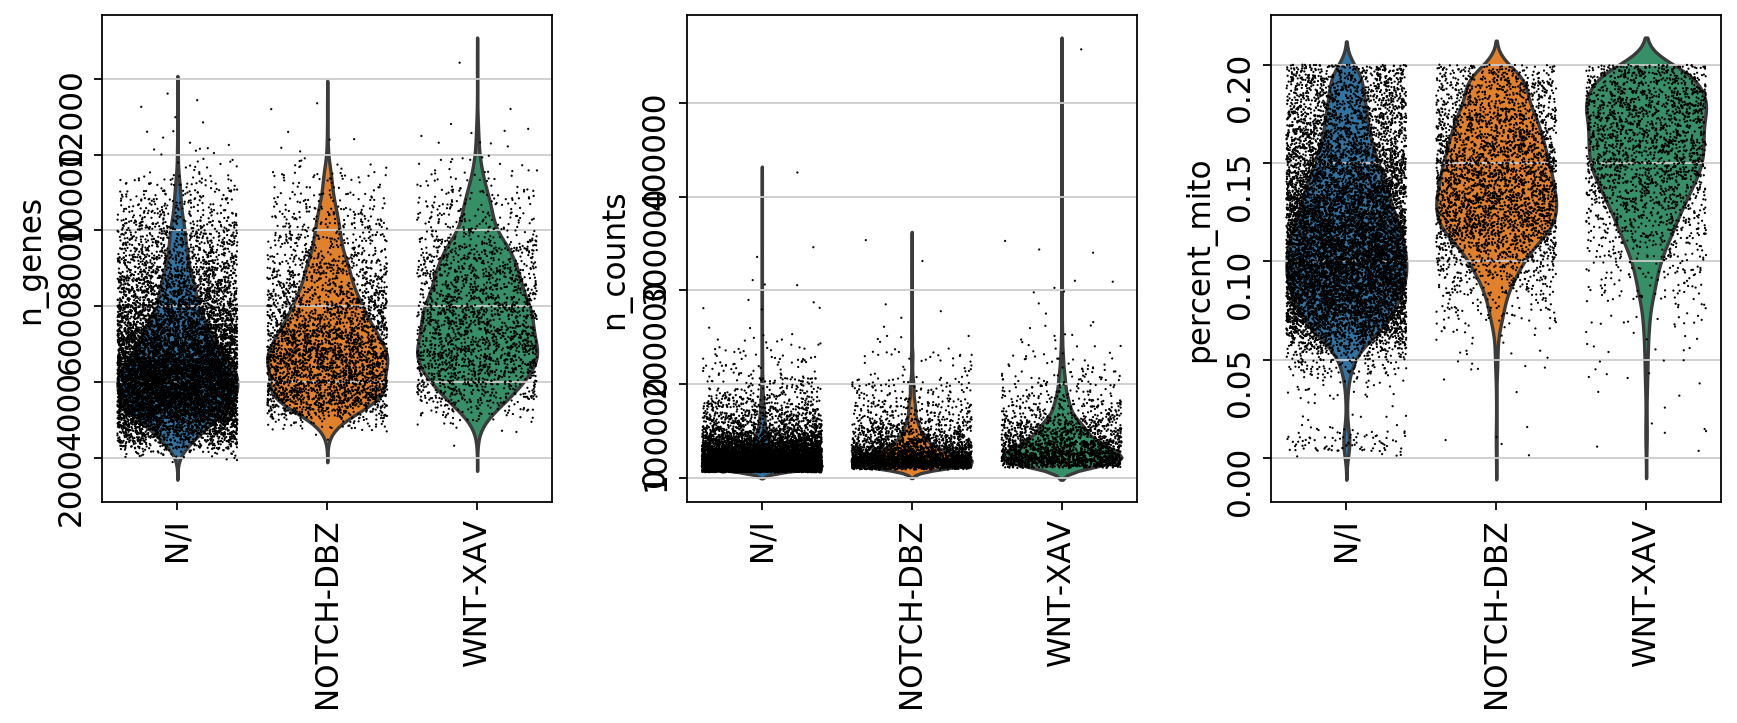

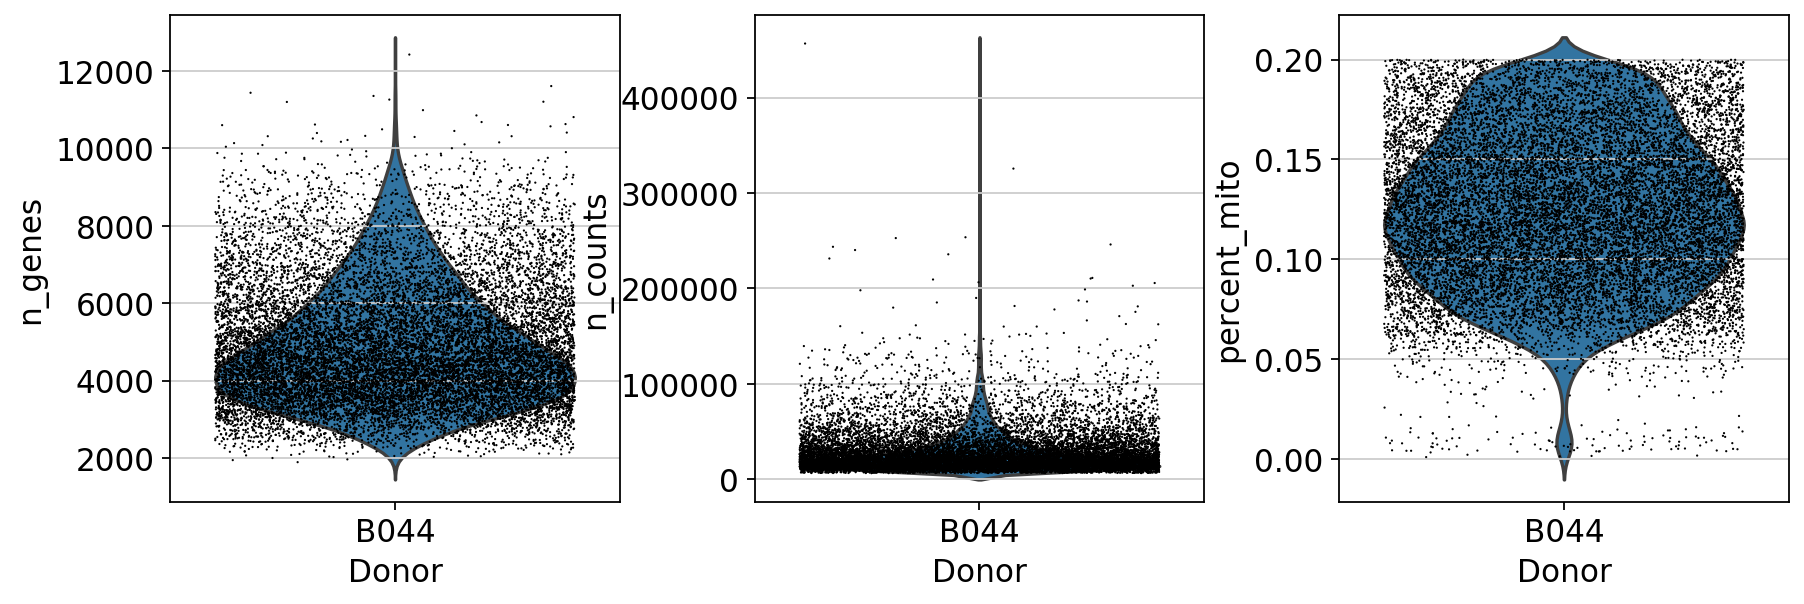

In [53]:
sc.pl.violin(adata, ['n_genes', 'n_counts', 'percent_mito'], groupby='Inhibition', rotation=90,  jitter=0.4, save='_perInhibition.pdf')
sc.pl.violin(adata, ['n_genes', 'n_counts', 'percent_mito'], groupby='Donor', jitter=0.4, save='_perDonor.pdf')

## Preprocess the data again

#### Filter non-expressed genes

In [54]:
sc.pp.filter_genes(adata, min_cells=5)
adata.raw = sc.pp.log1p(adata, copy=True)

#### Identify cells behaving like cc genes
Per genes analysis: identify genes behaving like known cell cycle genes

In [55]:
bdata = adata.copy()
# Normalize total counts per cell
sc.pp.normalize_per_cell(bdata, counts_per_cell_after=1e4)
# Logarithmize the data matrix
sc.pp.log1p(bdata)
# Extract highly variable genes
sc.pp.highly_variable_genes(bdata)
highly_variable_genes = bdata.var["highly_variable"]
bdata = bdata[:, highly_variable_genes]
# Traspose matrix for a GENE-centered analysis
bdata = bdata.copy().T

In [56]:
# Scale data to unit variance and zero mean
sc.pp.scale(bdata, max_value=10)
# Scatter plot in PCA coordinates
sc.tl.pca(bdata)

In [57]:
num_pcs = 20
# Compute a neighborhood graph of observations
sc.pp.neighbors(bdata,n_pcs=num_pcs)
# Embed the neighborhood graph using UMAP
sc.tl.umap(bdata)
# Cluster GENES into subgroups using louvain: resolution < 1 to find less clusters
sc.tl.leiden(bdata, resolution=0.5)

In [58]:
# Locate ccs cluster
bdata.obs['known_cyclers'] = [i in ['CDK1','MKI67','CCNB2','PCNA'] for i in bdata.obs_names]
sc.pl.umap(bdata, color=['known_cyclers', 'leiden'], color_map='OrRd',save='_ccg_identification.pdf', show=False)
print(bdata.obs.loc[[i in ['CDK1','MKI67','CCNB2','PCNA'] for i in bdata.obs_names],'leiden'])

CDK1     5
MKI67    5
CCNB2    5
PCNA     5
Name: leiden, dtype: category
Categories (6, object): [0, 1, 2, 3, 4, 5]


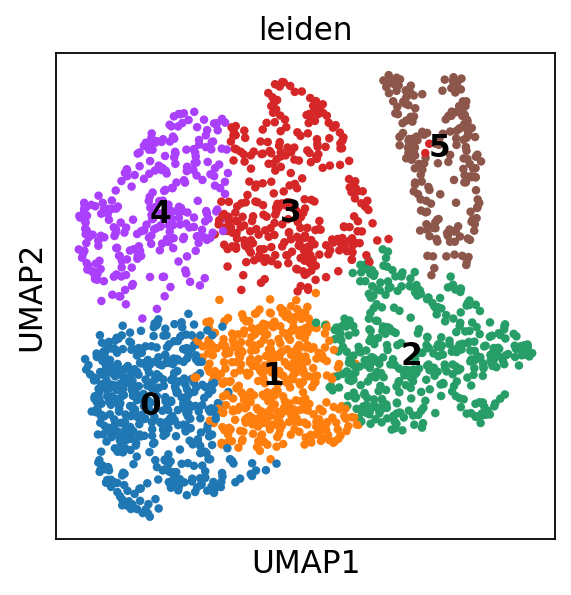

In [59]:
sc.pl.umap(bdata, color='leiden', save=None, legend_loc='on data', show=False)

In [60]:
ccgs_cl = bdata.obs.loc['CDK1',['leiden']][0]
print("Cell cycle genes cluster is "+ccgs_cl)

Cell cycle genes cluster is 5


#### Remove ccgs

In [61]:
# Add unstructured dict-like annotation for ccgs
adata.uns['ccgs'] = list(bdata.obs[bdata.obs['leiden']==ccgs_cl].index)

In [62]:
# Remove cc genes
print('Total number of genes before ccg filter: {:d}'.format(adata.n_vars))
adata = adata[:,[i not in adata.uns['ccgs'] for i in adata.var_names]]
print('Total number of genes after ccg filter: {:d}'.format(adata.n_vars))

Total number of genes before ccg filter: 22468
Total number of genes after ccg filter: 22284


#### Normalize per cell

In [63]:
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)
sc.pp.log1p(adata)

Trying to set attribute `.obs` of view, making a copy.


#### HVGs
These are going to be definetively different from the global annlysis. It is key to redefine these.

In [64]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, min_disp=0.25)
# sc.pp.highly_variable_genes(adata, n_top_genes=2000)

In [65]:
len(set(adata.var_names[  adata.var["highly_variable"] ]))

2660

In [66]:
# Filter HVGs
highly_variable_genes = adata.var["highly_variable"]
adata = adata[:, highly_variable_genes]

In [67]:
adata.X.shape

(15869, 2660)

#### Scale and regress out cell cycle genes

In [68]:
# Scale
sc.pp.scale(adata, max_value=10)

/home/jovyan/my-conda-envs/myenvSC/lib/python3.7/site-packages/scanpy/preprocessing/_simple.py:869: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [69]:
# # Regress out cell cycle genes
# cell_cycle_genes = [x.strip() for x in open(file='/home/jovyan/farm/gsea/raw/seurat_cellcycle/regev_lab_cell_cycle_genes.txt')]
# s_genes = cell_cycle_genes[:43]
# g2m_genes = cell_cycle_genes[43:]
# s_genes = [x for x in s_genes if x in adata.var_names]
# g2m_genes = [x for x in g2m_genes if x in adata.var_names]
# sc.tl.score_genes_cell_cycle(adata, s_genes=s_genes, g2m_genes=g2m_genes)
# # sc.pp.regress_out(adata, ['S_score', 'G2M_score'])

## PCA

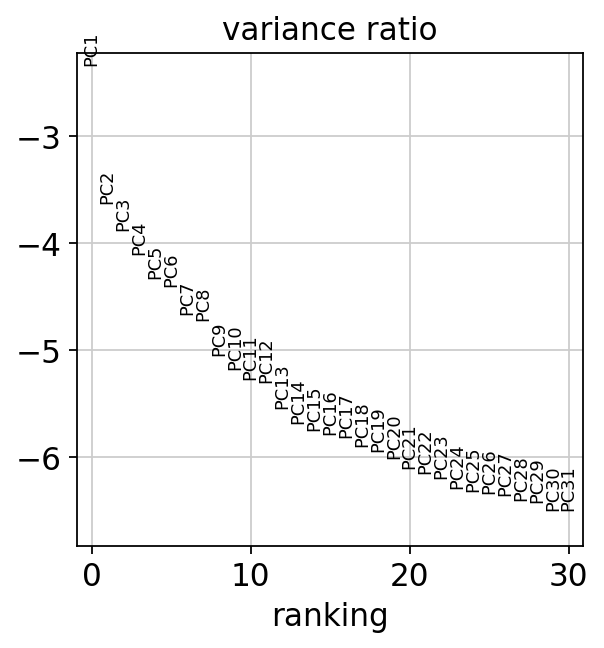

In [70]:
sc.tl.pca(adata, svd_solver='arpack')
sc.pl.pca_variance_ratio(adata, log=True, save='.pdf')

In [139]:
n_pcs = 12

In [140]:
# visualize before integration
sc.pp.neighbors(adata, n_pcs = n_pcs, random_state=1)
sc.tl.umap(adata)

/home/jovyan/my-conda-envs/myenvSC/lib/python3.7/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../my-conda-envs/myenvSC/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))


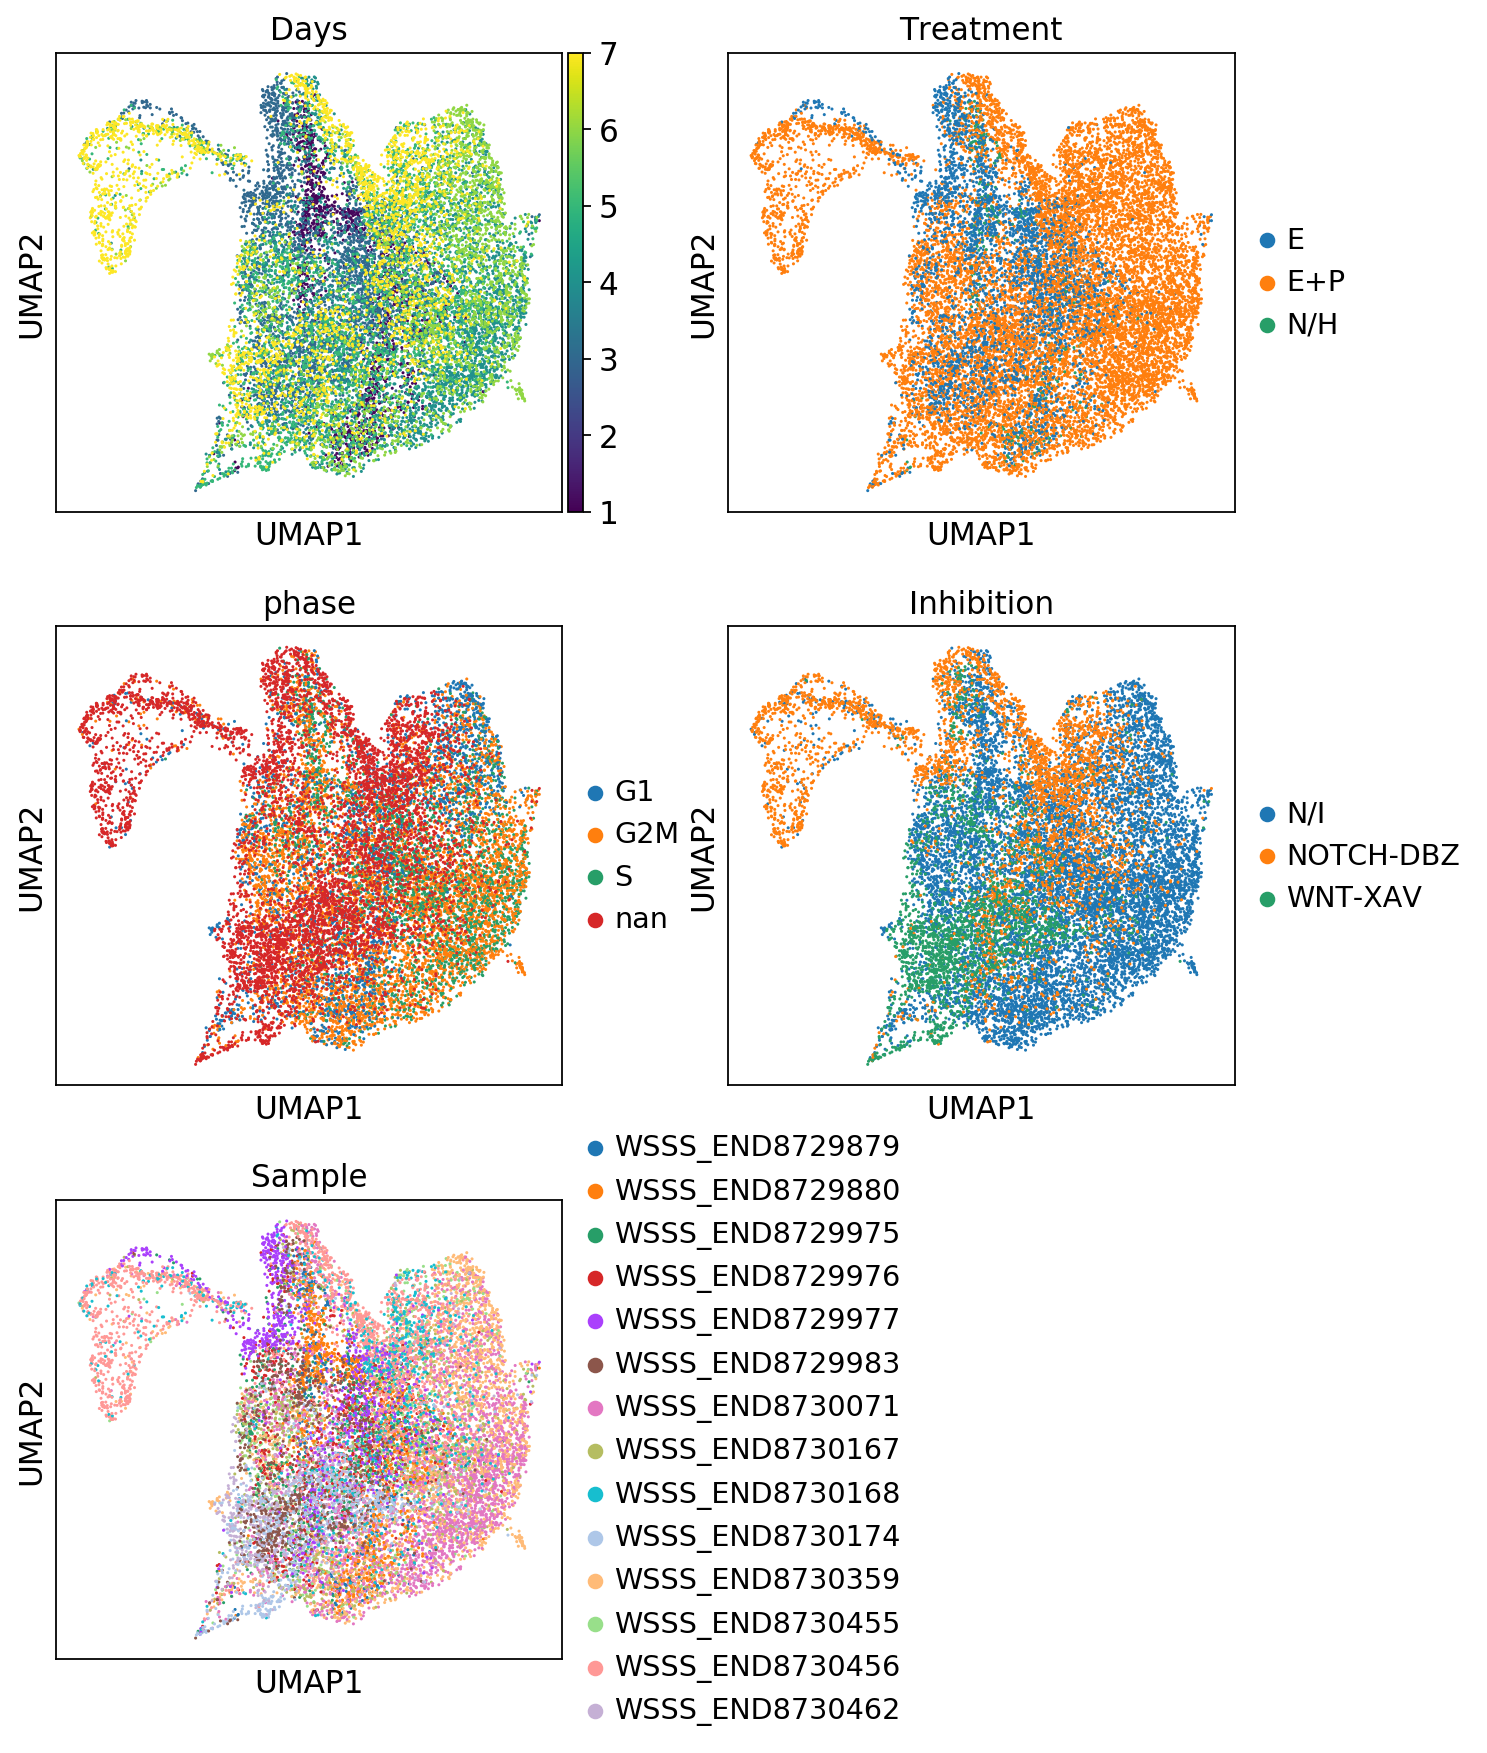

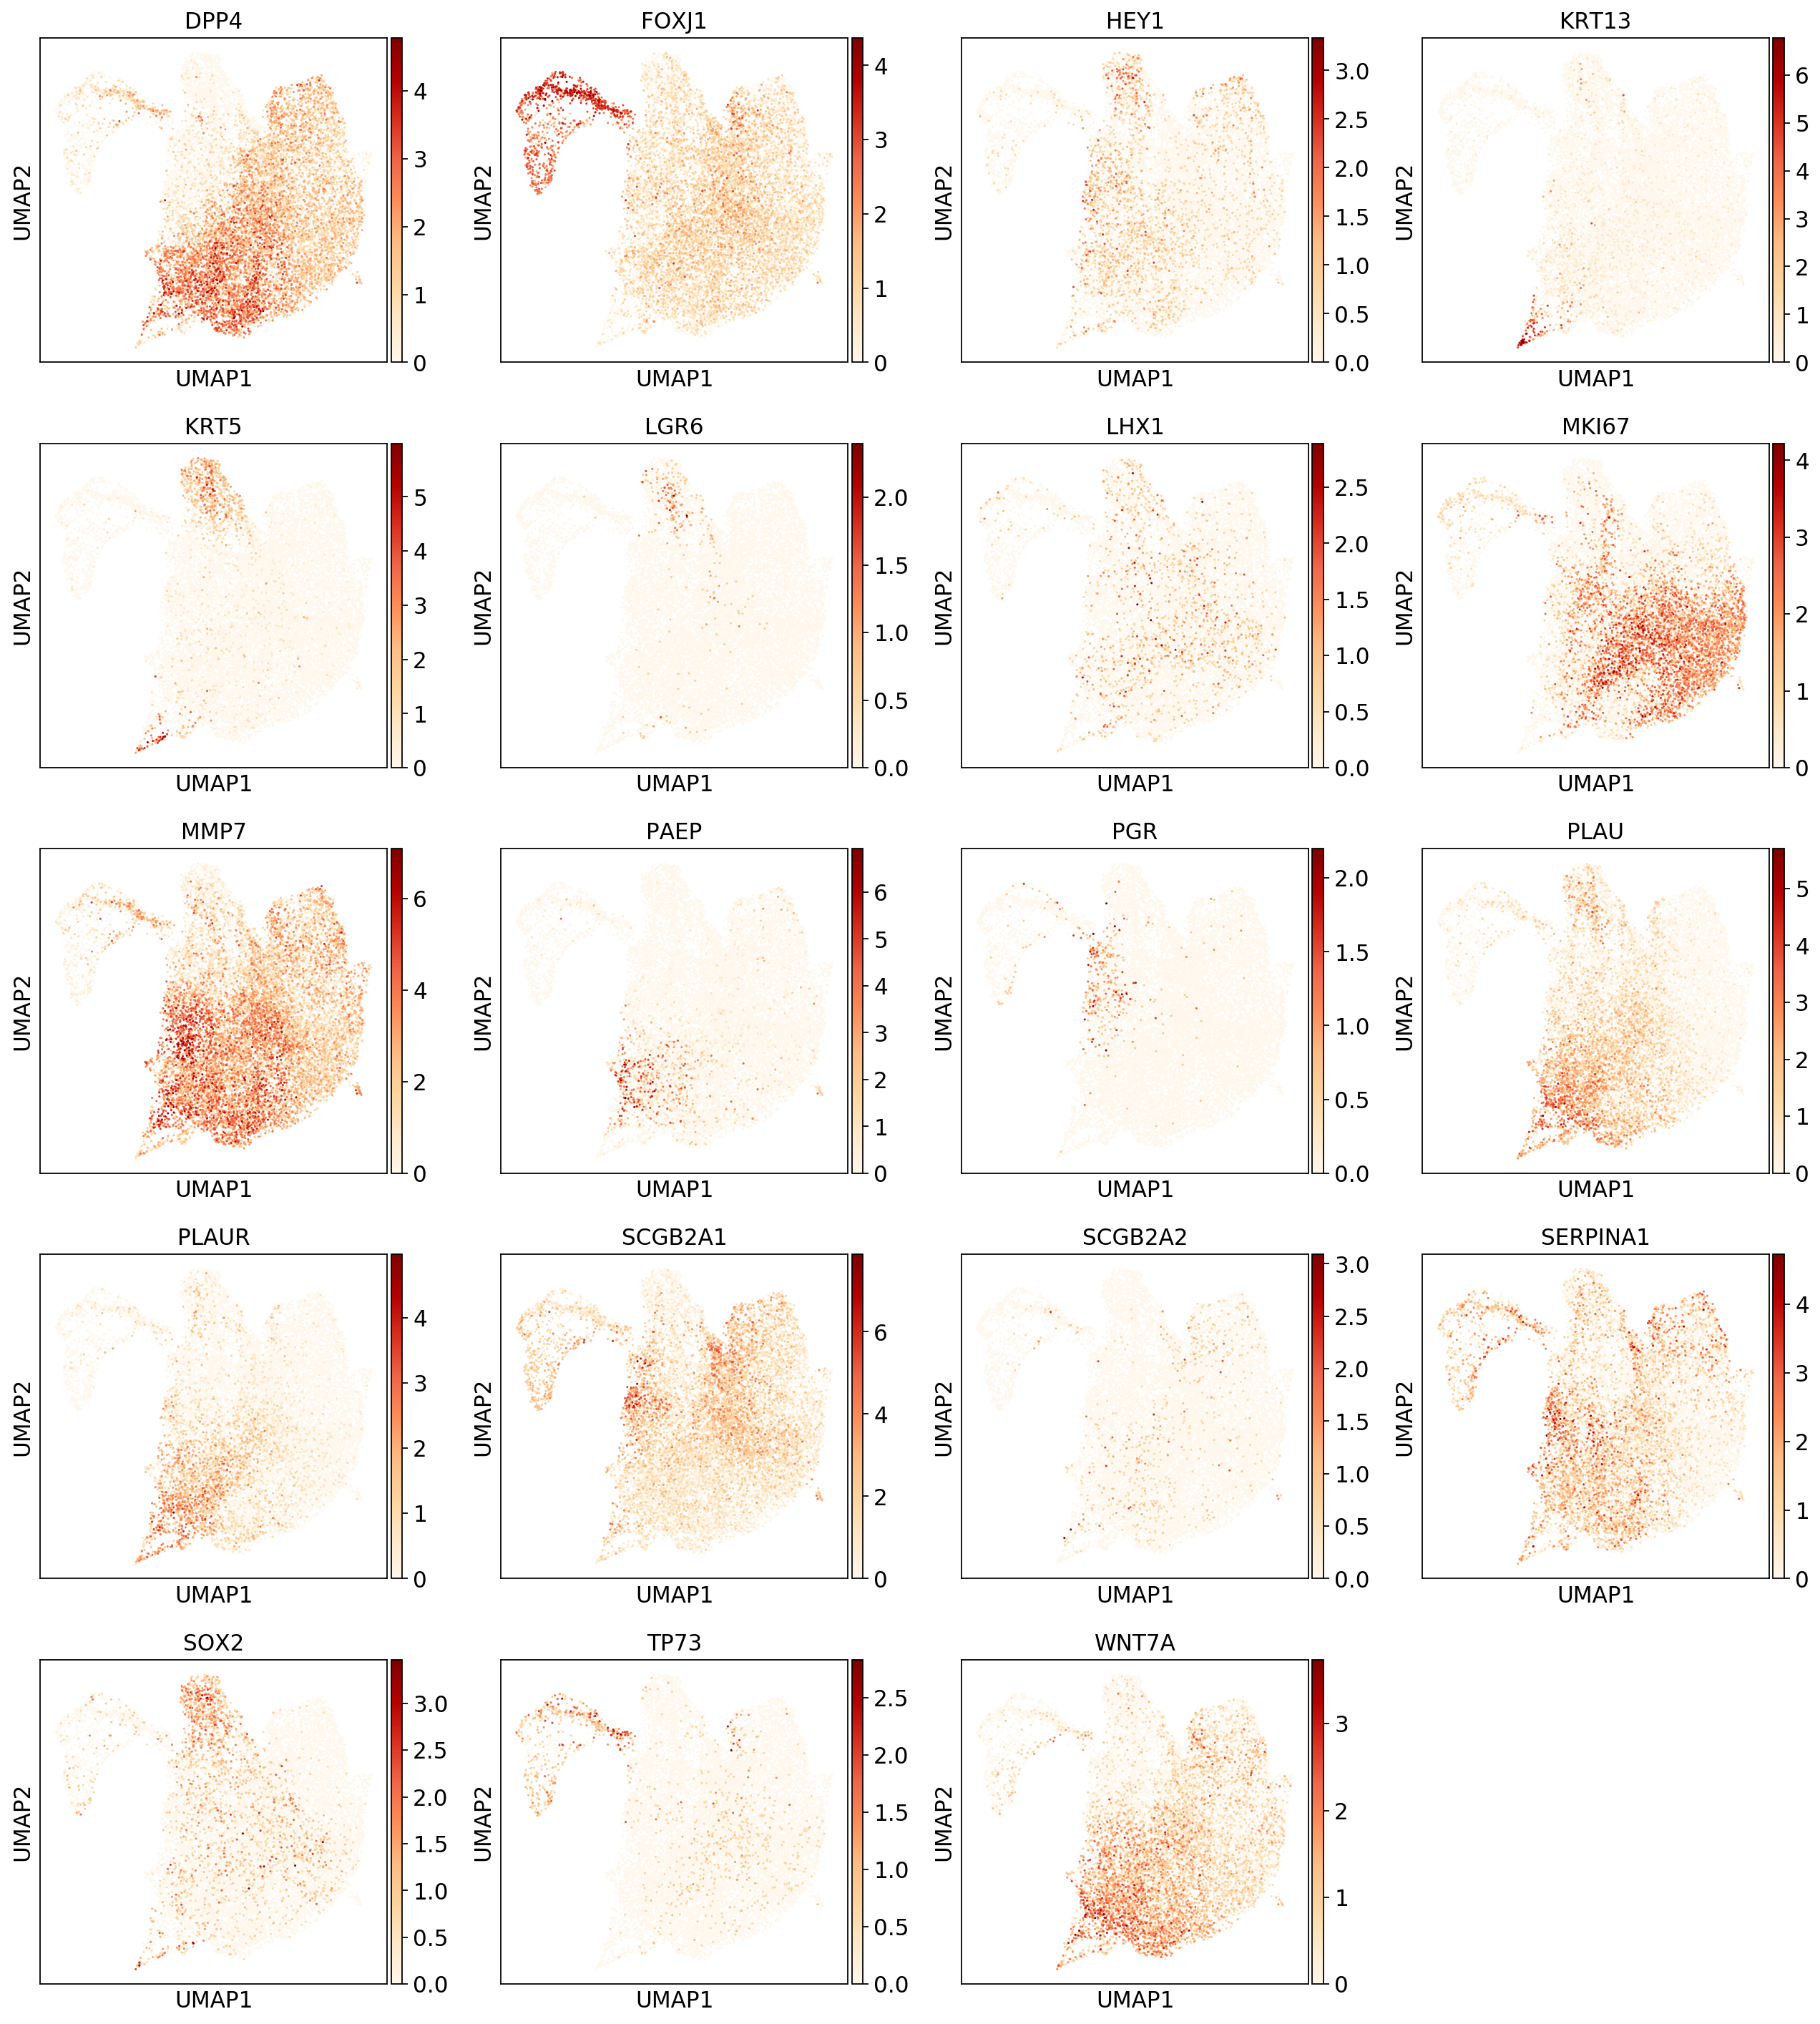

In [141]:
sc.pl.umap(adata, color=['Days', 'Treatment',  'phase', 'Inhibition', 'Sample'], save='_meta.pdf', ncols = 2)
markers = ["PAEP", "DPP4", "WNT7A", "FOXJ1", "KRT13", 
                         "SOX2", "LGR6", "MMP7", "LHX1", "KRT5",
                         "TP73", "SERPINA1", "SCGB2A1", 'SCGB2A2', "HEY1", "PLAU", "PLAUR", "MKI67", "PGR"]
markers = sorted(markers)
sc.pl.umap(adata, color=markers,  save='-markers.pdf',color_map='OrRd', use_raw=True)

## Identify sub-clusters

In [172]:
sc.tl.leiden(adata, resolution=0.15)

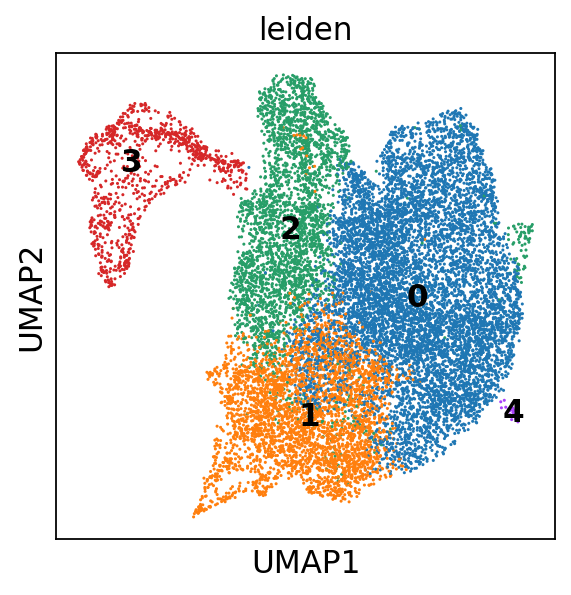

In [173]:
sc.pl.umap(adata, color=['leiden'],legend_loc='on data',save='_clustering_clusnumbers.pdf')

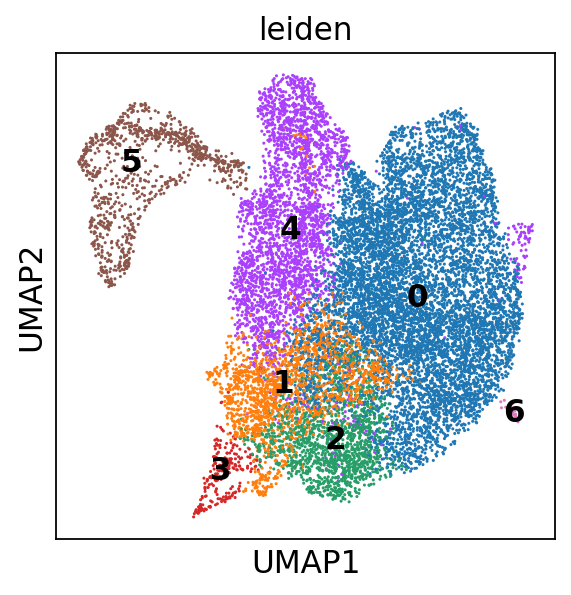

In [174]:
sc.tl.leiden(adata, resolution=0.15, restrict_to=('leiden', ['1']))
adata.obs['leiden'].cat.categories = [str(i) for i in range(len(adata.obs['leiden'].cat.categories))]
sc.pl.umap(adata, color=['leiden'],legend_loc='on data',save='_clustering_clusnumbers.pdf')

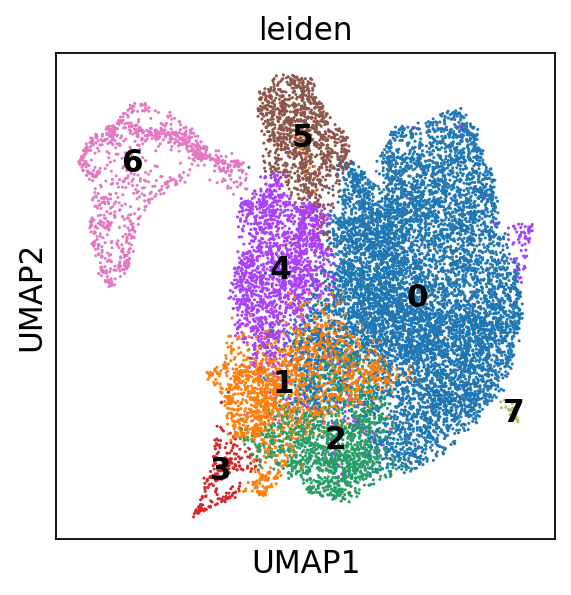

In [175]:
sc.tl.leiden(adata, resolution=0.1, restrict_to=('leiden', ['4']))
adata.obs['leiden'].cat.categories = [str(i) for i in range(len(adata.obs['leiden'].cat.categories))]
sc.pl.umap(adata, color=['leiden'],legend_loc='on data',save='_clustering_clusnumbers.pdf')

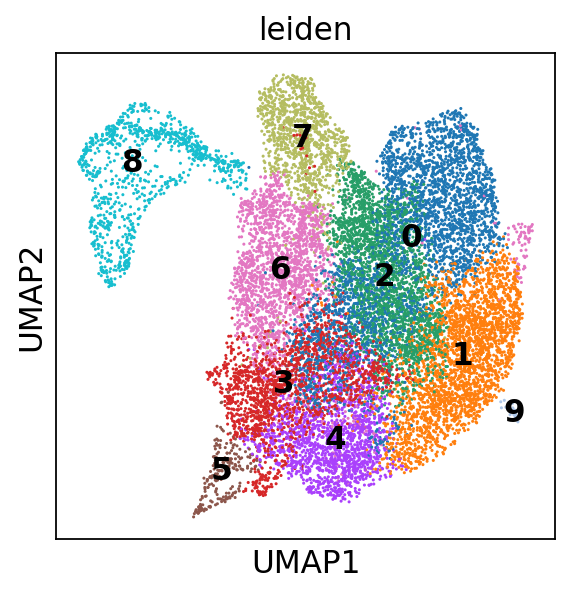

In [176]:
sc.tl.leiden(adata, resolution=0.15, restrict_to=('leiden', ['0']))
adata.obs['leiden'].cat.categories = [str(i) for i in range(len(adata.obs['leiden'].cat.categories))]
sc.pl.umap(adata, color=['leiden'],legend_loc='on data',save='_clustering_clusnumbers.pdf')

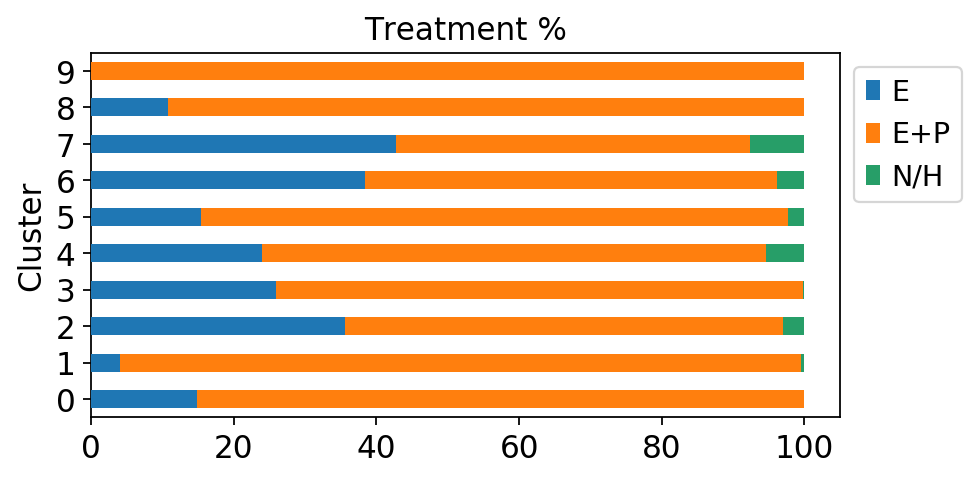

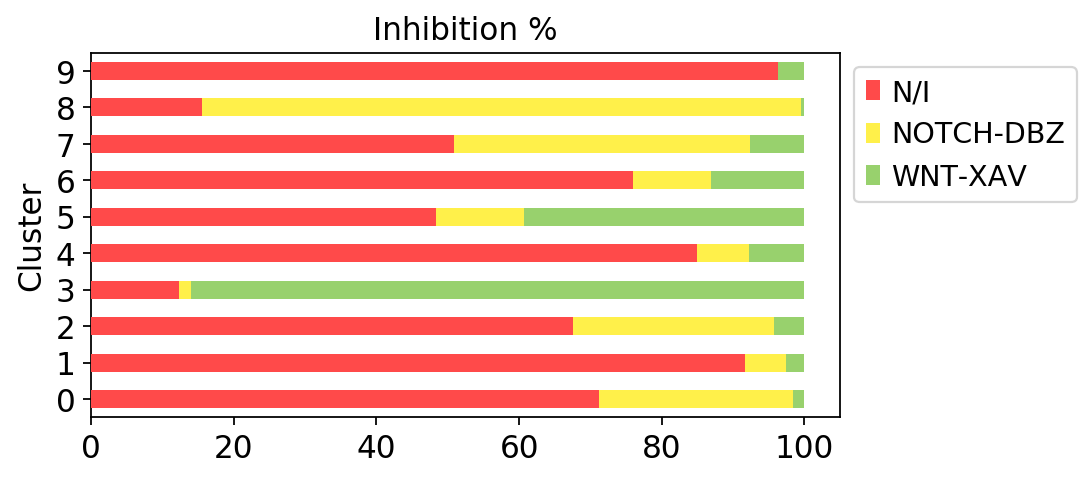

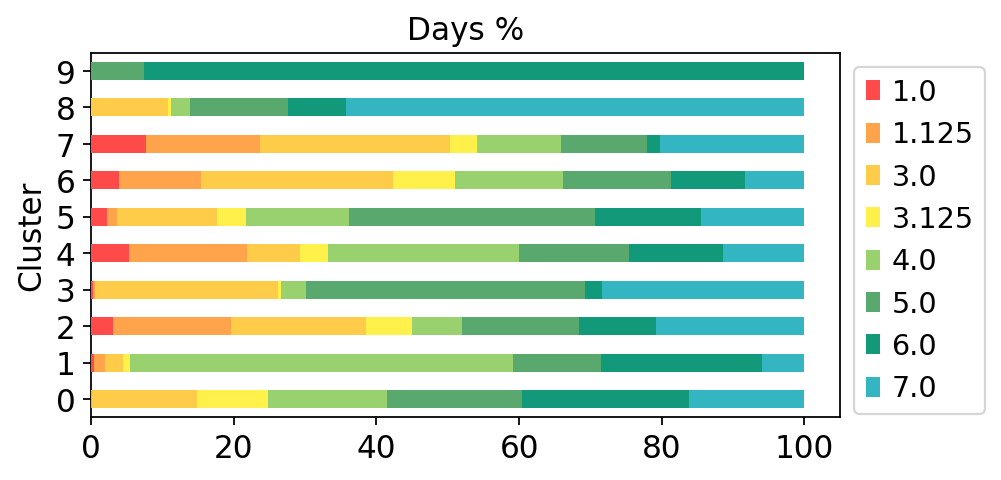

In [178]:
def Barplot(which_var, adata, var='leiden', height=3, color = False):
    plotdata = pd.crosstab(adata.obs[var], adata.obs[which_var], normalize='index') * 100
    if not color:
        ax1 = plotdata.plot.barh(stacked = True, edgecolor = 'none', zorder = 3, figsize = (6,height), fontsize = 14, grid = False)
    else:
        ax1 = plotdata.plot.barh(stacked = True, edgecolor = 'none', zorder = 3, figsize = (6,height), fontsize = 14, grid = False, color = color)
    ax1.set_title(which_var+' %')
    ax1.set_ylabel('Cluster')
    horiz_offset = 1
    vert_offset = 1.
    ax1 = ax1.legend(bbox_to_anchor = (horiz_offset, vert_offset))
    ax1.figure.savefig(str(sc.settings.figdir)+'/barplot_'+var+'_proportions_'+which_var+'.pdf', dpi=300, orientation='landscape', format= 'pdf')
Barplot('Treatment', adata)
color = ['#ff4a4a', '#fff04a', '#98d16d', '#34b6c2', '#349cc2']
Barplot('Inhibition', adata, color = color)
color = ['#ff4a4a', '#ffa44a', '#ffcc4a', '#fff04a', '#98d16d', '#59a86e', '#119979', '#34b6c2', '#349cc2']
# color = ['#ff4a4a',  '#ffcc4a',  '#98d16d',  '#119979',  '#349cc2']
Barplot('Days', adata, color = color)

## Save

In [179]:
# os.system('rm data/organoids-I-keep-ccg_forSeurat.h5ad')
# adata_count = anndata.AnnData(X=np.expm1(adata.raw.X), var=adata.raw.var, obs=adata.obs, asview=False)
# adata_count.write('data/organoids-I-keep-ccg_forSeurat.h5ad')

os.system('rm data/organoids-confI-keep-ccg_Luzprocessing_Donor44.h5ad')
adata.write('data/organoids-confI-keep-ccg_Luzprocessing_Donor44.h5ad')